In [1]:
import fastf1 as ff1
from fastf1 import plotting
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd


In [2]:
img_dir = '../img/'

# Setup plotting
plotting.setup_mpl()

# Enable the cache
ff1.Cache.enable_cache('../../cache')

# Get rid of some pandas warnings that are not relevant for us at the moment
pd.options.mode.chained_assignment = None

compound_colors = {
    'SOFT': '#FF3333',
    'MEDIUM': '#FFF200',
    'HARD': '#EBEBEB',
    'INTERMEDIATE': '#39B54A',
    'WET': '#00AEEF',
}


In [3]:
# Load the session data
race = ff1.get_session(2022, 'Belgium', 'R')

# Get the laps
laps = race.load_laps(with_telemetry=True)


/home/ilias/anaconda3/lib/python3.9/site-packages/fastf1/core.py:1220: FutureWarning: `Session.load_laps` is deprecated and will beremoved in a future version.
Use `Session.load` instead.
  warnings.warn("`Session.load_laps` is deprecated and will be"
core           INFO 	Loading data for Belgian Grand Prix - Race [v2.3.0]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '55', '63', '14', '16', '31', '5',

In [4]:
driver_stints = laps[['Driver', 'Stint', 'Compound', 'LapNumber']].groupby(
    ['Driver', 'Stint', 'Compound']).count().reset_index()

driver_stints = driver_stints.rename(columns={'LapNumber': 'StintLength'})
driver_stints = driver_stints.sort_values(by=['Stint'])


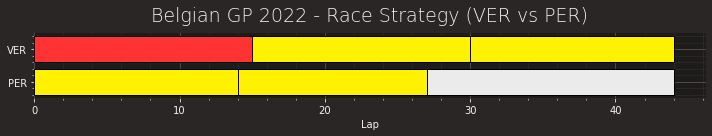

In [5]:
plt.rcParams["figure.figsize"] = [10, 2]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()

drivers = ['VER', 'PER']

for driver in drivers:
    stints = driver_stints.loc[driver_stints['Driver'] == driver]

    previous_stint_end = 0
    for _, stint in stints.iterrows():
        plt.barh(
            [driver],
            stint['StintLength'],
            left=previous_stint_end,
            color=compound_colors[stint['Compound']],
            edgecolor="black"
        )

        previous_stint_end = previous_stint_end + stint['StintLength']

plt.title(f'Belgian GP 2022 - Race Strategy (VER vs PER)')
plt.xlabel('Lap')
plt.gca().invert_yaxis()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.savefig(img_dir + 'strategy_ver_per_belgianGP2022.png', dpi=300)
plt.show()


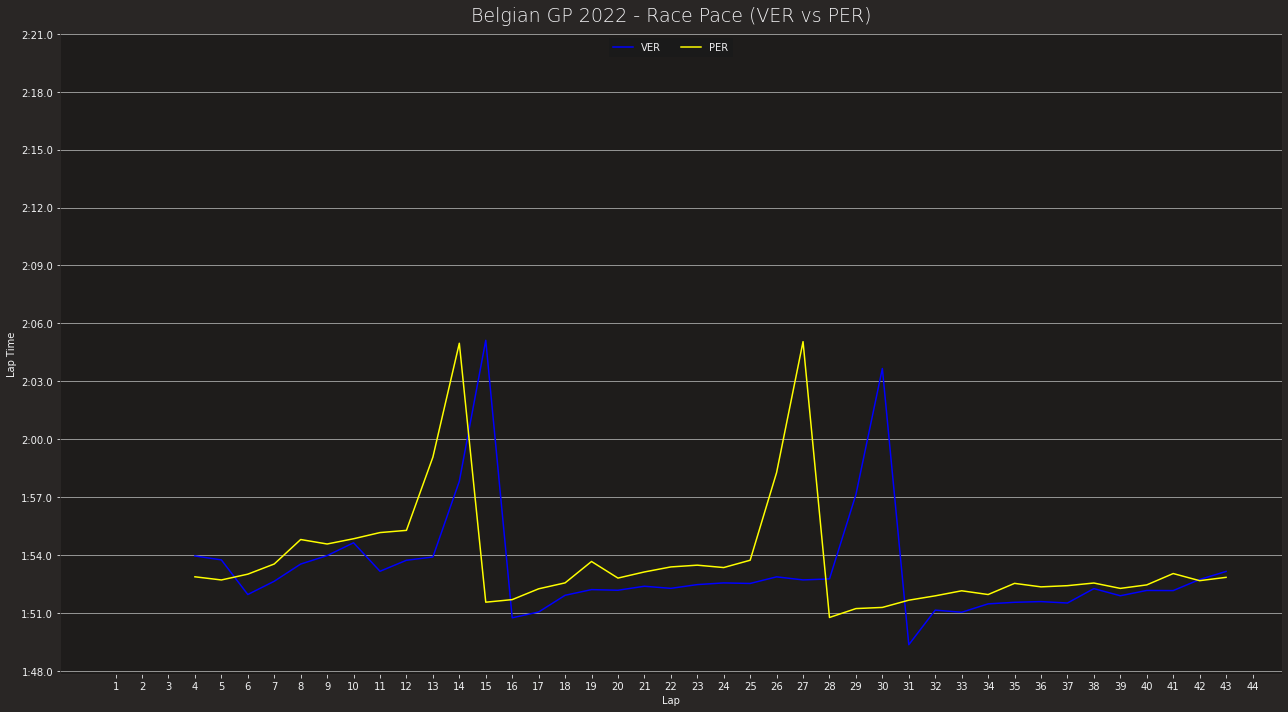

In [6]:
laps_driver1 = laps.pick_driver('VER')
laps_driver5 = laps.pick_driver('PER')

laps_driver1['RaceLapNumber'] = laps_driver1['LapNumber'] - 1
laps_driver5['RaceLapNumber'] = laps_driver5['LapNumber'] - 1

plt.rcParams['figure.figsize'] = [18, 10]

plt.plot(laps_driver1['RaceLapNumber'],
         laps_driver1['LapTime'], label='VER', color='blue')
plt.plot(laps_driver5['RaceLapNumber'],
         laps_driver5['LapTime'], label='PER', color='yellow')
plt.ylabel('Lap Time')
plt.xlabel('Lap')
plt.title(f'Belgian GP 2022 - Race Pace (VER vs PER)')
plt.legend(loc="upper center", ncol=2)
plt.gca().yaxis.grid(True)
plt.savefig(img_dir + 'race_pace_ver_per_belgianGP2022.png', dpi=300)
plt.xticks(laps_driver1['LapNumber'].values.tolist())
plt.show()


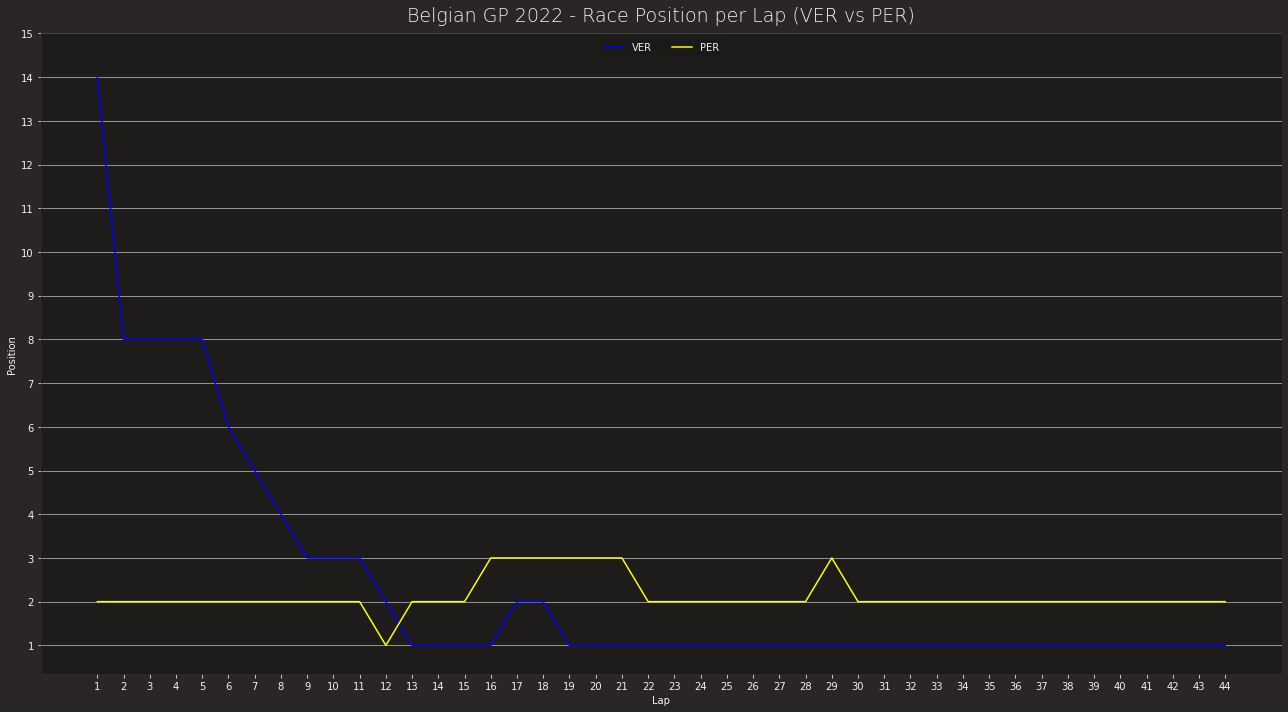

In [8]:
laps_driver1 = laps.pick_driver('VER')
laps_driver5 = laps.pick_driver('PER')

lap_positions_driver1 = [14, 8, 8, 8, 8, 6, 5, 4, 3, 3, 3, 2, 1, 1, 1, 1, 2, 2,
                         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
lap_positions_driver5 = [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 3, 3, 3,
                         3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
y_ticks = [i for i in range(1, 16)]

plt.rcParams['figure.figsize'] = [18, 10]

plt.plot(laps_driver1['LapNumber'],
         lap_positions_driver1, label='VER', color='blue')
plt.plot(laps_driver5['LapNumber'],
         lap_positions_driver5, label='PER', color='yellow')
plt.ylabel('Position')
plt.xlabel('Lap')
plt.title(f'Belgian GP 2022 - Race Position per Lap (VER vs PER)')
plt.legend(loc="upper center", ncol=2)
plt.gca().yaxis.grid(True)
plt.xticks(laps_driver1['LapNumber'].values.tolist())
plt.yticks(y_ticks)
plt.savefig(img_dir + 'race_position_per_lap_ver_per_belgianGP2022.png', dpi=300)
plt.show()
